In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.rcParams.update({'font.size': 18})

In [2]:
expected = np.genfromtxt('NDC_curve.csv', delimiter=',').T
req_2C = np.genfromtxt('updated_2C_curve.csv', delimiter=',').T
req_2C_func=interp1d(req_2C[0],10*req_2C[1])
expected_func=interp1d(expected[0],10*expected[1])

In [ ]:
# expected = np.genfromtxt('expected.csv', delimiter=',').T
# req_2C = np.genfromtxt('2C_curve.csv', delimiter=',').T
# req_2C_func=interp1d(req_2C[0],req_2C[1])
# expected_func=interp1d(expected[0],expected[1])

Text(2080, 15, '1600t')

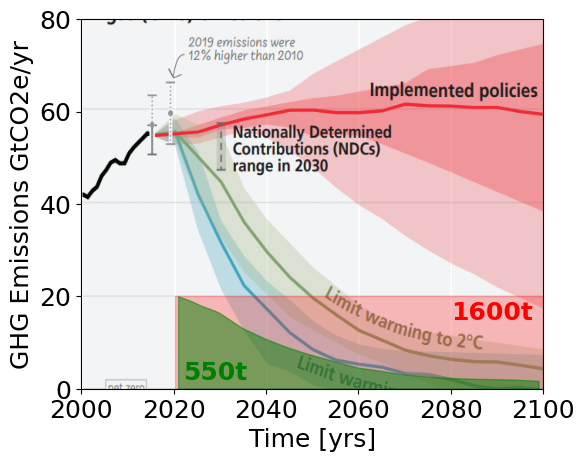

In [18]:
x=np.arange(2021,2100,1)
# plt.plot(x,expected_func(x))
# plt.plot(x,req_2C_func(x))
im=plt.imread('emissions_vs_time.png')
im = plt.gca().imshow(im, extent=[2000, 2100, -20, 89])

plt.axhspan(0,20,color='r',alpha=0.25,xmin=0.2021)
plt.fill_between(x,0*np.ones_like(x),20*req_2C_func(x)/max(req_2C_func(x)),color='g',alpha=0.5)
plt.ylim(0,80)
plt.xlabel("Time [yrs]")
plt.ylabel("GHG Emissions GtCO2e/yr")
plt.text(2022,2,'550t',color='g',fontweight='bold')
plt.text(2080,15,'1600t',color='r',fontweight='bold')

In [4]:
def trapz_integral(x,y):
    integral=[0]
    for i,xi in enumerate(x):
        if i==0:
            continue
        integral.append(np.trapz(y[:i-1], x[:i-1]))
    return np.array(integral)

In [5]:
trapz_integral(x,20*req_2C_func(x)/max(req_2C_func(x)))[-1]

545.6445862098801

In [6]:
trapz_integral(x,20*np.ones_like(x))[-1]

1520.0

In [7]:
(2100-2021)*20

1580

(2022.0, 2100.0)

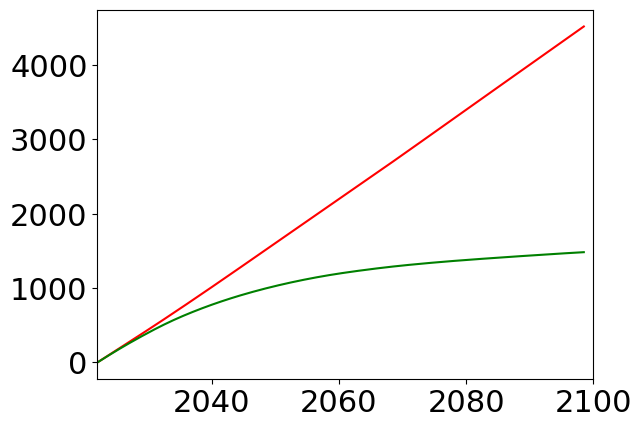

In [28]:
x=np.arange(2021,2099,0.5)
plt.plot(x,trapz_integral(x,expected_func(x)),color='r')
plt.plot(x,trapz_integral(x,req_2C_func(x)),color='green')
plt.xlim([2022,2100])

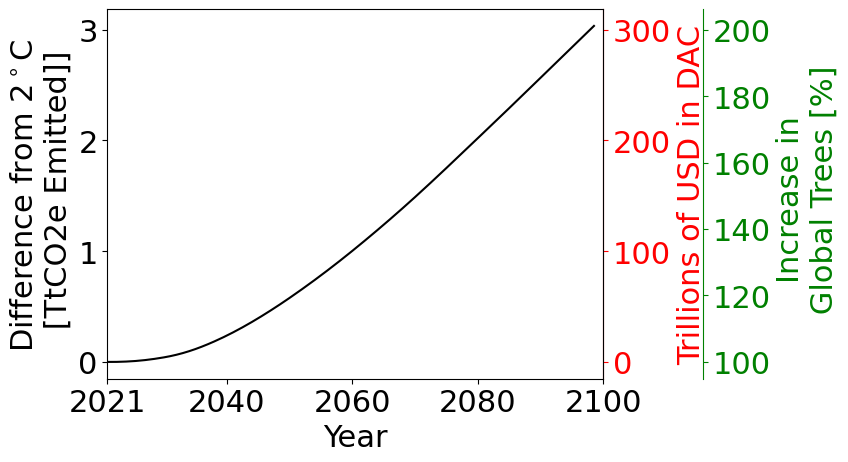

In [29]:

plt.rcParams.update({'font.size': 22})
x=np.arange(2021,2099,0.5)
y=trapz_integral(x,expected_func(x))-trapz_integral(x,req_2C_func(x))
plt.plot(x,y/1000,color='k')




ax=plt.gca()
def CO2_to_Cost(x):
    return 100*1e9*x*1e3/1e12


def Cost_to_CO2(x):
    return 1e12*x/(100*1e9*1e3)


secax_y = ax.secondary_yaxis(
    'right', functions=(CO2_to_Cost, Cost_to_CO2),color='r')
secax_y.set_ylabel(r'Trillions of USD in DAC')


def CO2_to_Trees(x):
    return 1e11*x*1e3/3e12+100


def Trees_to_CO2(x):
    return 3e12*x/(1e11*1e3)-100


def CO2_to_Damage(x):
    return 400*1e9*x*1e3/1e12


def Damage_to_CO2(x):
    return 1e12*x/(400*1e9*1e3)
# use of a float for the position:
secax_y2 = ax.secondary_yaxis(
    1.2, functions=(CO2_to_Trees, Trees_to_CO2),color='g')
secax_y2.set_ylabel('Increase in \n Global Trees [%]')


# # use of a float for the position:
# secax_y3 = secax_y2.secondary_yaxis(
#     1.2, functions=(CO2_to_Damage, Damage_to_CO2),color='Purple')
# secax_y3.set_ylabel('Damages in USD') 


plt.ylabel("Difference from 2$^\circ$C \n [TtCO2e Emitted]]")
plt.xlabel('Year')
plt.xlim([2021,2100])
plt.xticks(list(plt.xticks()[0])[1:] + [2021])
plt.savefig("plot.png",bbox_inches="tight")

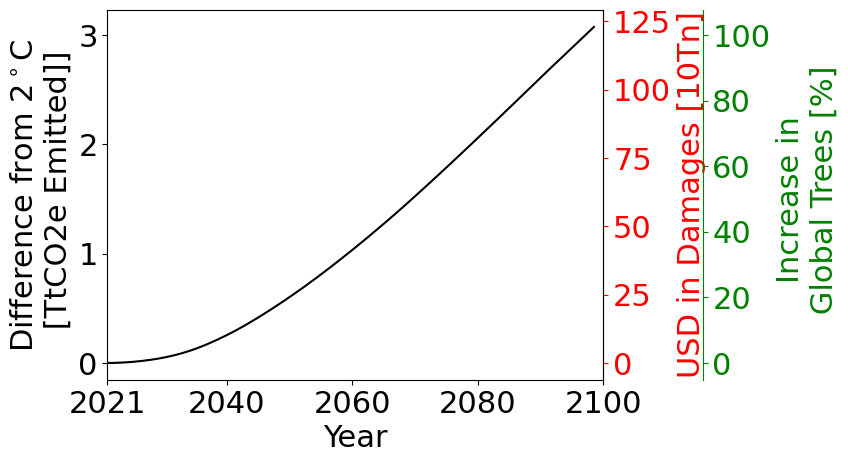

In [7]:

plt.rcParams.update({'font.size': 22})
x=np.arange(2021,2099,0.5)
y=trapz_integral(x,expected_func(x))-trapz_integral(x,req_2C_func(x))
plt.plot(x,y/1000,color='k')




ax=plt.gca()
def CO2_to_Damage(x):
    return 40*1e9*x*1e3/1e12


def Damage_to_CO2(x):
    return 1e12*x/(40*1e9*1e3)

secax_y = ax.secondary_yaxis(
    'right', functions=(CO2_to_Damage, Damage_to_CO2),color='r')
secax_y.set_ylabel(r'USD in Damages [10Tn]')


def CO2_to_Trees(x):
    return 1e11*x*1e3/3e12


def Trees_to_CO2(x):
    return 3e12*x/(1e11*1e3)



# use of a float for the position:
secax_y2 = ax.secondary_yaxis(
    1.2, functions=(CO2_to_Trees, Trees_to_CO2),color='g')
secax_y2.set_ylabel('Increase in \n Global Trees [%]')



plt.ylabel("Difference from 2$^\circ$C \n [TtCO2e Emitted]]")
plt.xlabel('Year')
plt.xlim([2021,2100])
plt.xticks(list(plt.xticks()[0])[1:] + [2021])
plt.savefig("plot_damage.png",bbox_inches="tight")

In [8]:
CO2_to_Cost(3000),Cost_to_CO2(300)

(300000.0, 3.0)

(2022.0, 2100.0)

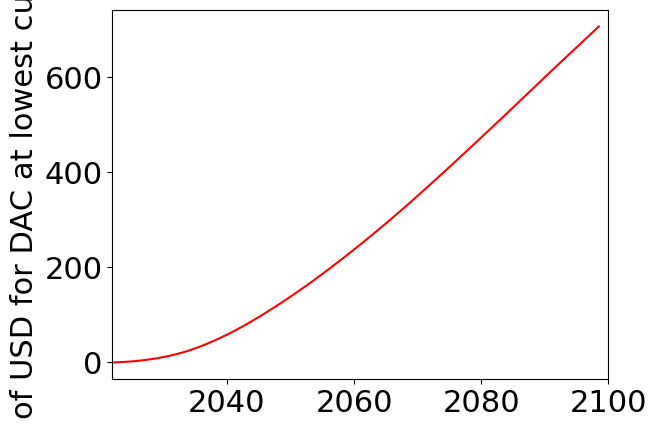

In [9]:

plt.plot(x,(230*1e9*y)/1e12,color='r')
plt.ylabel("Trillions of USD for DAC at lowest current cost")
plt.xlim([2022,2100])

(2022.0, 2100.0)

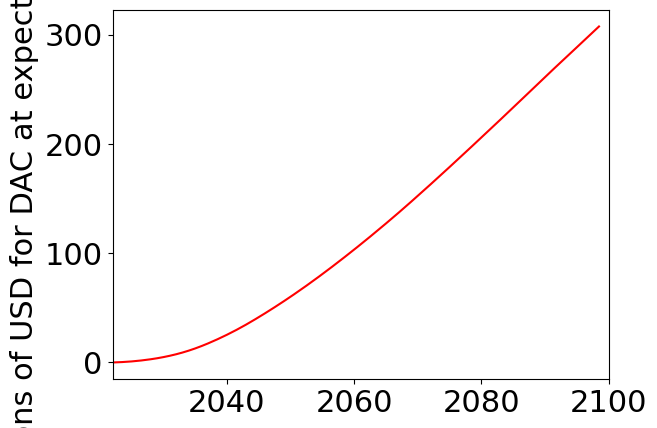

In [10]:

plt.plot(x,(100*1e9*y)/1e12,color='r')
plt.ylabel("Trillions of USD for DAC at expected cost")
plt.xlim([2022,2100])

(2022.0, 2100.0)

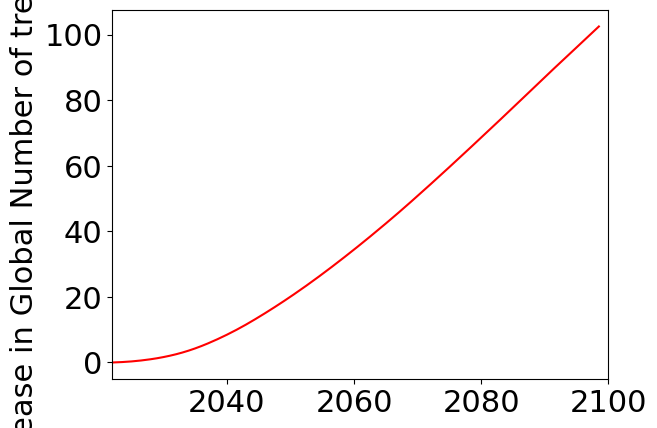

In [11]:

plt.plot(x,100*((1e9*y)/3e12),color='r')
plt.ylabel("Increase in Global Number of trees [%]")
plt.xlim([2022,2100])